In [ ]:
# user_id, order_dt, order_products, order_amount
# data between Jan 1997 - Jun 1998, about 60000 rows

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')

In [3]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')

In [4]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
# transform date
# one customer has multiple orders in oneday
df.describe()
# mean.product 2.4, std.product 2.3, 75% 2~3 products
# per order_amount,small amount 30~45

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [6]:
df.info()
# 69659 means non null,date's type is int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### Data Cleaning

In [7]:
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
# order_date to month
df['month'] = df['order_date'].dt.to_period('M')
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01
1,2,19970112,1,12.00,1997-01-12,1997-01
2,2,19970112,5,77.00,1997-01-12,1997-01
3,3,19970102,2,20.76,1997-01-02,1997-01
4,3,19970330,2,20.76,1997-03-30,1997-03


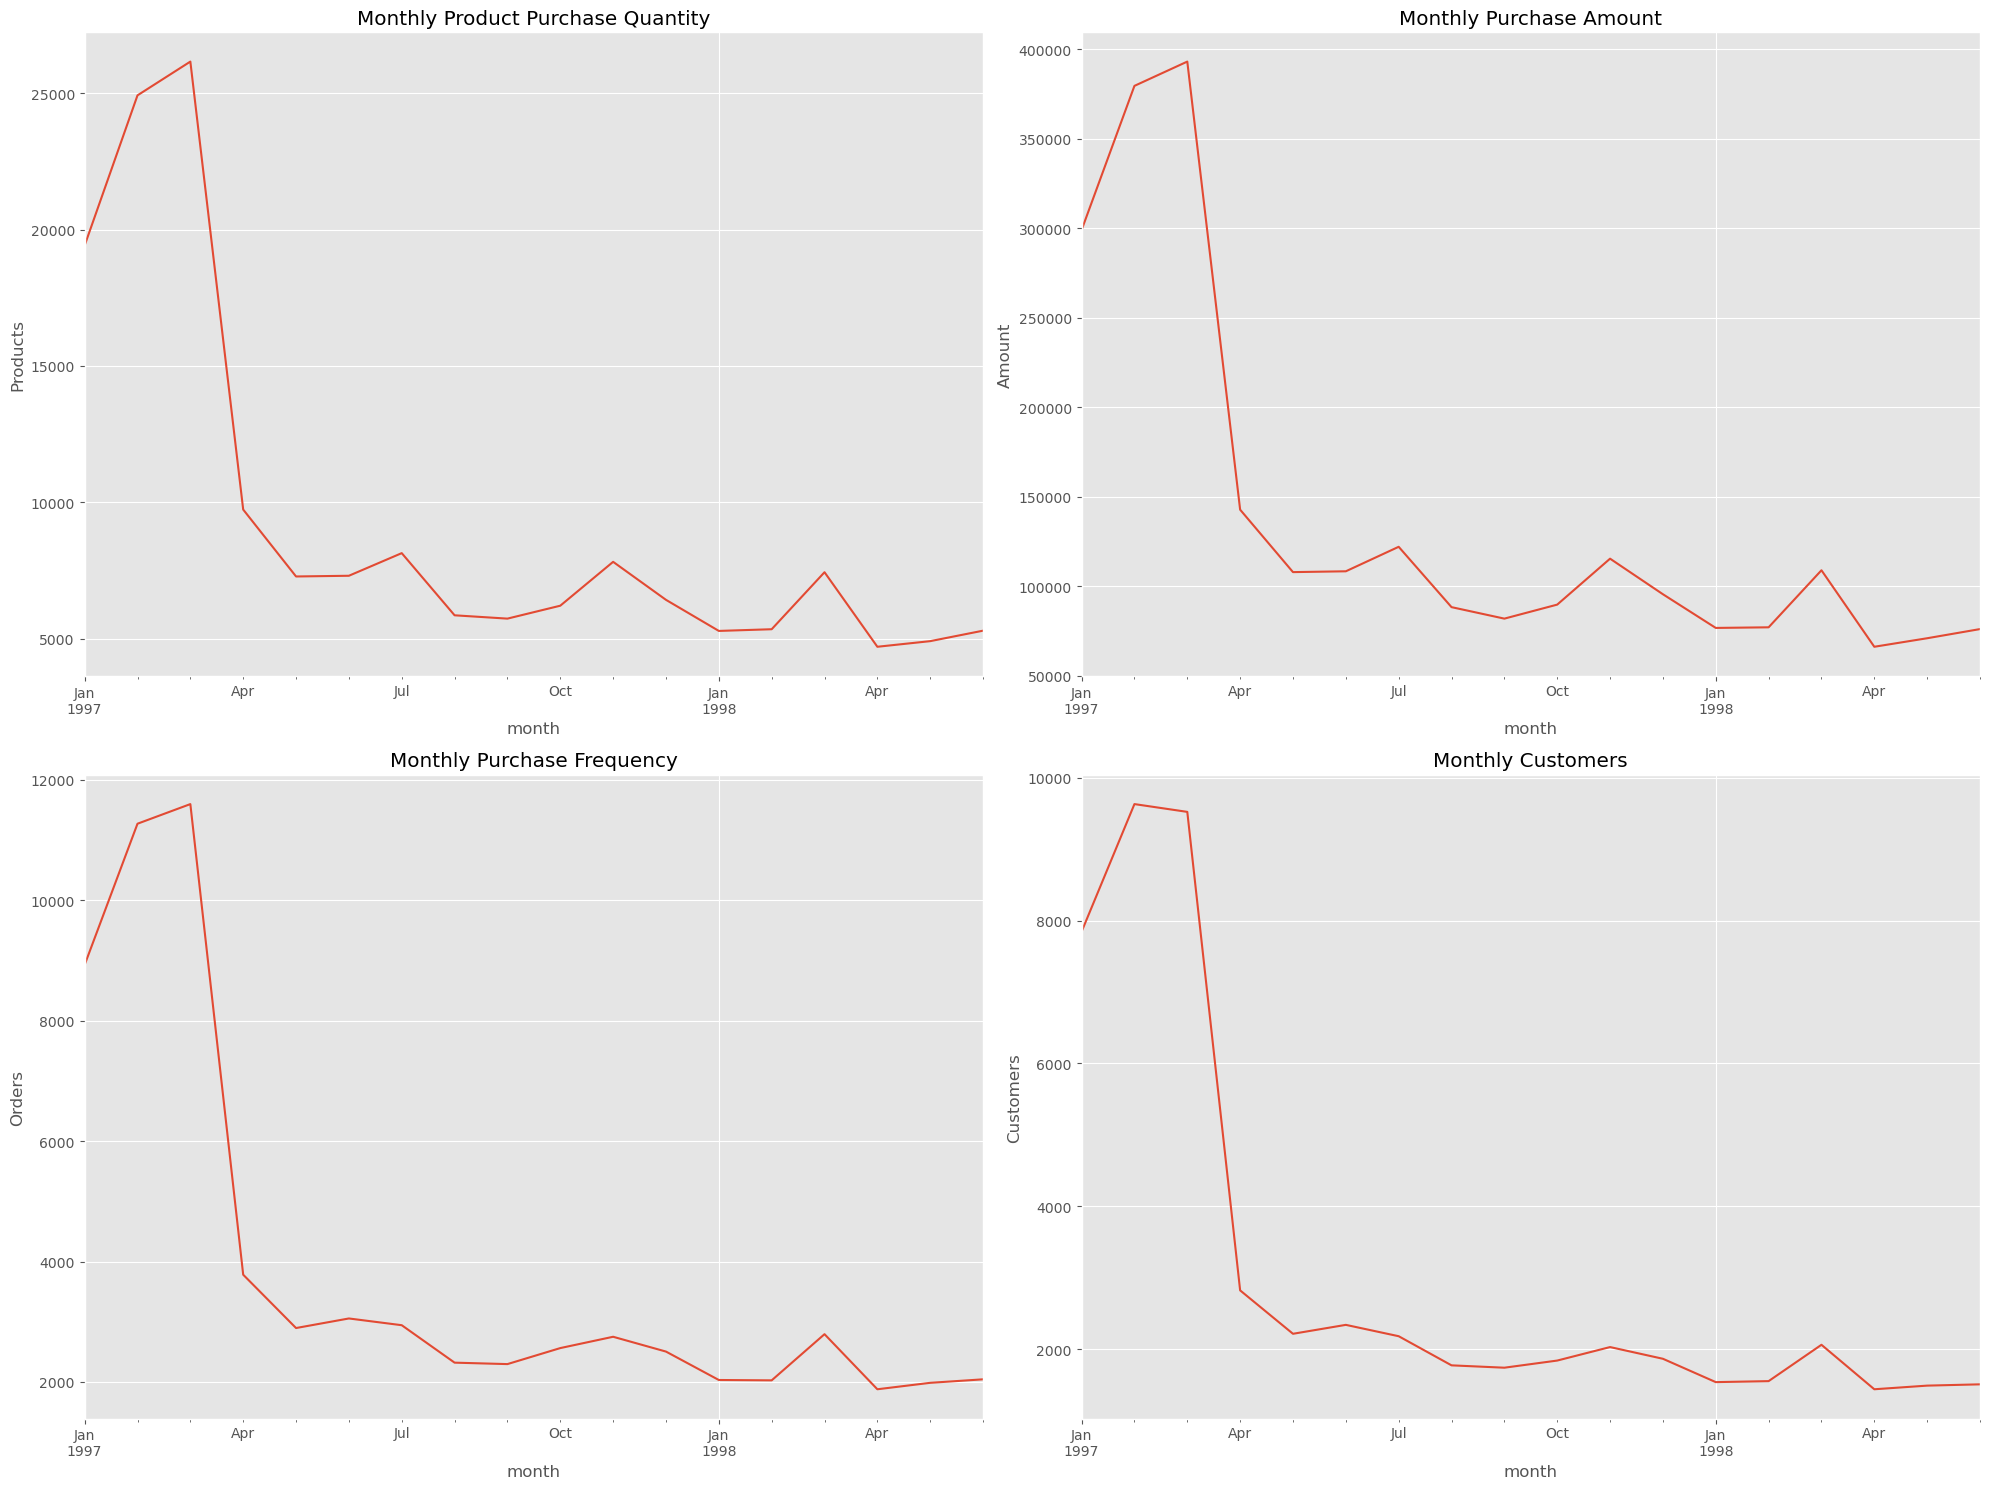

In [17]:

# Trend Analysis
plt.figure(figsize=(20, 15))

# 1. Monthly product purchase quantity
plt.subplot(2, 2, 1)
df.groupby('month')['order_products'].sum().plot()
plt.title('Monthly Product Purchase Quantity')
plt.ylabel('Products')

# 2. Monthly purchase amount
plt.subplot(2, 2, 2)
df.groupby('month')['order_amount'].sum().plot()
plt.title('Monthly Purchase Amount')
plt.ylabel('Amount')

# 3. Monthly purchase frequency
plt.subplot(2, 2, 3)
df.groupby('month')['user_id'].count().plot()
plt.title('Monthly Purchase Frequency')
plt.ylabel('Orders')

# 4. Monthly customers (unique users)
plt.subplot(2, 2, 4)
df.groupby('month')['user_id'].nunique().plot()
plt.title('Monthly Customers')
plt.ylabel('Customers')

plt.tight_layout()  # Adjust subplot spacing automatically
plt.show()

# Key Findings:
# 1. Product Quantity: High sales in Q1 (first 3 months), then declined and stabilized.
# 2. Purchase Amount: Proportional to quantity, peaked in Q1, dropped significantly after March. 
#    Potential causes: (a) Holiday season effect, (b) Increased promotions in Jan-Mar.
# 3. Order Frequency: ~10,000 orders/month in Q1, averaged ~2,500 in subsequent months.
# 4. Customer Count: 8,000-10,000 customers in Q1, dropped to <2,000 afterwards.
# Conclusion: The data shows unusual consumption patterns in Q1 1997, which normalized afterwards.

## Customer Consumption Analysis 

#### 1. Customer Spending Amount, Purchase Frequency,  Product Quantity,  Descriptive Statistics

In [25]:
user_grouped = df.groupby('user_id').sum(numeric_only=True)
print(user_grouped.describe())
print('user amount:',len(user_grouped))
# From the user perspective: 
# - Total users: 23,570
# - Average products purchased per user: 7
# - Median products purchased: 3
# - Maximum purchase quantity: 1,033
# - Distribution type: Right-skewed (mean > median)

# From the spending amount perspective:
# - Average user spending: $106
# - Median spending: $43
# - Maximum spending: $13,990 (high-value user)
# - Mean ≈ 75th percentile
# - Distribution type: Right-skewed
# - Insight: The top 25% of users contribute disproportionately to total revenue

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
user amount: 23570


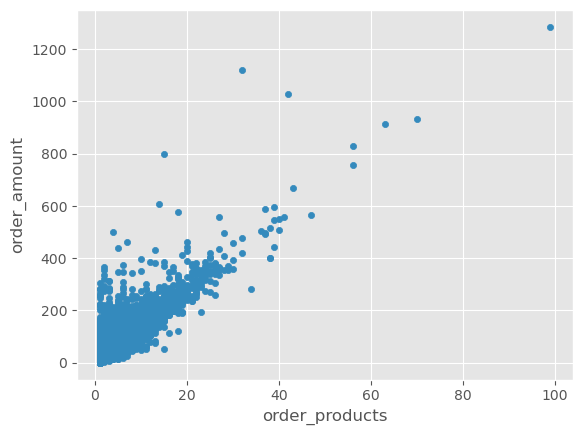

In [160]:
# Visualization: 
# Generate a scatter plot displaying the relationship between product purchase quantity (x-axis) and spending amount (y-axis)
df.plot(kind='scatter',x='order_products',y='order_amount')
plt.show()
# Linear Relationship Analysis:
# - Spending amount shows strong linear correlation with purchase quantity
# - Average price per product: ~$15
# - Relationship: Spending ≈ Quantity × $15

# Outlier Analysis:
# - Outlier criteria: Spending > $1,000 OR Quantity > 60
# - Outlier frequency: Minimal (few extreme values)
# - Impact on sample: Negligible
# - Recommendation: Can be excluded from analysis without affecting results

#### 2. Customer Spending Distribution

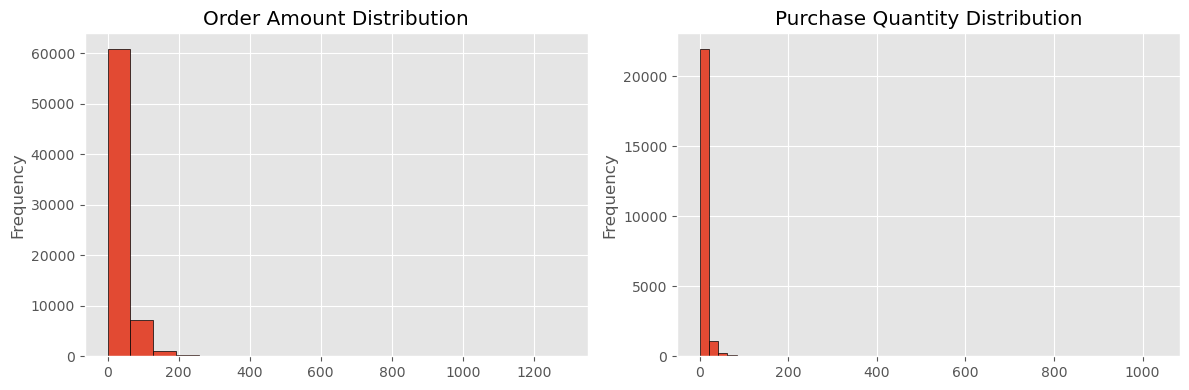

In [40]:
# Create figure with two subplots
plt.figure(figsize=(12, 4))

# Subplot 1: Order Amount Distribution
plt.subplot(121)
plt.xlabel('Spending per Transaction ($)')
df['order_amount'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Order Amount Distribution')
# Note: bins parameter controls the number of intervals
# Larger bins value = narrower bars
# Bar width = (max value - min value) / bins

# Subplot 2: Purchase Quantity per User Distribution
plt.subplot(122)
plt.xlabel('Products Purchased per User')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist', bins=50, edgecolor='black')
plt.title('Purchase Quantity Distribution')

plt.tight_layout()
plt.show()

# Key Insights:
# 1. The majority of orders have spending amounts within $100
# 2. Purchase quantities per user are concentrated under 50 products
# 3. Our customer base is primarily characterized by:
#    - Low-value transactions (under $100)
#    - Small purchase quantities (under 50 items per user)

#### 3. Customer Contribution Analysis (Cumulative Spending Distribution)

In [41]:
# Analyze what percentage of customers contribute to what percentage of revenue
# Typical use case: Identify if 20% of customers generate 80% of revenue (Pareto Principle)

In [42]:
# Group users, extract spending amount, sum, sort, and reset index
user_cumsum = df.groupby('user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [44]:
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum.tail()

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [45]:
# Total Revenue
amount_total = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum'] / amount_total,axis=1) #Top XX Customers Contribution: XX%
user_cumsum.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


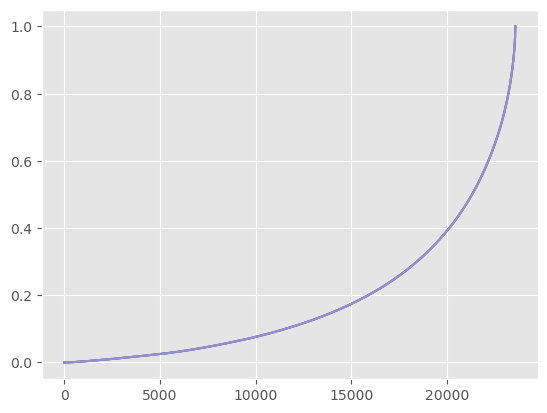

In [49]:
user_cumsum['prop'].plot()
plt.show()
"""
The data follows a standard Pareto distribution pattern:
- Top 15% of customers (3,500 users) contribute 60% of total revenue
- Remaining 85% of customers (20,000 users) contribute 40% of revenue

This is a typical Pareto distribution (60/15), where a minority of 
high-value customers drive the majority of revenue.
"""

## 4. User Purchase Behavior Analysis

#### 1. First Purchase Date - Identify earliest transaction per customer

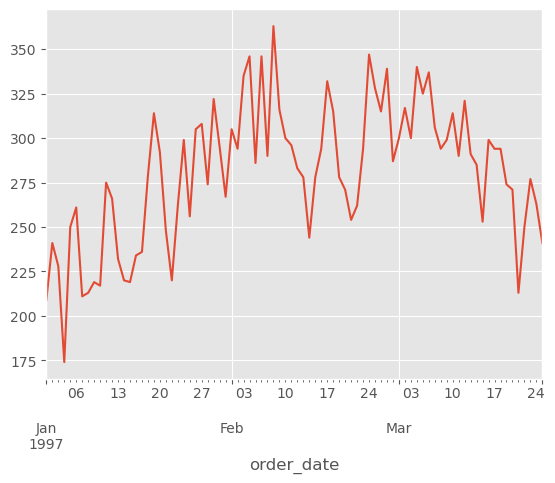

In [62]:
df.groupby('user_id')['order_date'].min().value_counts().sort_index().plot()
plt.show()
# Analysis: New customer acquisition showed a strong upward trend from Jan 1 - Feb 10, followed by a gradual decline. Possible reasons: increased marketing campaigns or promotional pricing during this period.

#### 2. Most Recent Purchase Date - Identify latest transaction per customer

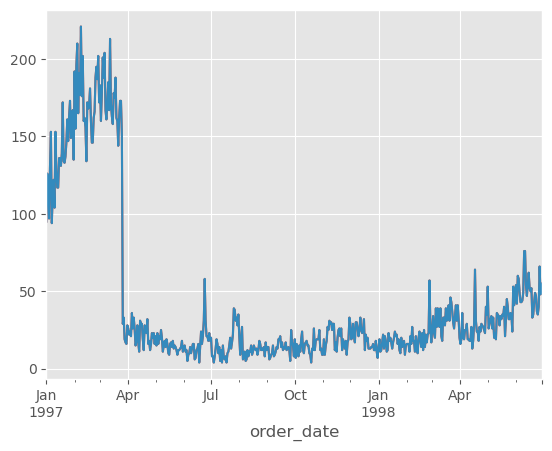

In [64]:
df.groupby('user_id')['order_date'].max().value_counts().sort_index().plot()
plt.show()
# The majority of users' last purchases occurred in the first 3 months, suggesting low customer loyalty.
# As time progresses, the count of last-time purchasers increases. Hypothesis: This dataset follows a cohort of users who made purchases in Q1 1997, tracking their behavior over the next 18 months.

#### Customer Segmentation


#### 1. Build RFM Model


In [69]:
#  Use Pivot Tables for Analysis (index equal to groupby, values means columns, aggfunc: key value
rfm = df.pivot_table(index='user_id', 
                     values=['order_products','order_amount','order_date'],
                     aggfunc={
                         'order_date':'max', # the last time purchase
                         'order_products':'sum',
                         'order_amount':'sum'
                     })
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [159]:
# Recency (R): Days since last purchase = max date - user's last purchase date (rounded to 1 decimal)
rfm['R'] =-(rfm['order_date'] - rfm['order_date'].max())/np.timedelta64(1,'D')
rfm.rename(columns={'order_products':'F','order_amount':'M'})
rfm.head()

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,Standard Growth Customers
2,89.00,1997-01-12,6,534.0,Standard Growth Customers
3,156.46,1998-05-28,16,33.0,Key Retention Customers
4,100.50,1997-12-12,7,200.0,Standard Recovery Customers
5,385.61,1998-01-03,29,178.0,Key Retention Customers


In [84]:
 # RFM Calculation Method Translation
'''
RFM Calculation Method: Subtract the mean of each column from each data point in that column, resulting in both positive and negative values. Compare the result with 1 - if >= 1, set it to 1; otherwise set it to 0.

RFM Calculation Approach:
1. For each column, subtract the column's mean from each value (creating standardized scores with positive and negative values)
2. Compare each standardized result against the threshold of 1
3. If the result >= 1, assign a value of 1; otherwise assign 0
'''
def rfm_func(x):  # x: represents a row of data
    level = x.apply(lambda x: 1 if x >= 1 else 0)
    # Convert to string and concatenate
    label = str(level['R']) + str(level['F']) + str(level['M'])
    
    d = {
        '111': 'High-Value Customers',
        '011': 'Key Retention Customers',
        '101': 'Key Growth Customers',
        '001': 'Key Recovery Customers',
        '110': 'Standard Value Customers',
        '010': 'Standard Retention Customers',
        '100': 'Standard Growth Customers',
        '000': 'Standard Recovery Customers'
    }
    result = d[label]
    return result

# Standardize data and apply function
rfm['label'] = rfm[['R','F',"M"]].apply(lambda x:x-x.mean()).apply(rfm_func, axis=1)
rfm.head()

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,Standard Growth Customers
2,89.00,1997-01-12,6,534.0,Standard Growth Customers
3,156.46,1998-05-28,16,33.0,Key Retention Customers
4,100.50,1997-12-12,7,200.0,Standard Recovery Customers
5,385.61,1998-01-03,29,178.0,Key Retention Customers


High-Value Customers               M order_date   F      R                 label
user_id                                                    
19       175.12 1997-06-10  11  385.0  High-Value Customers
20       653.01 1997-01-18  46  528.0  High-Value Customers
27       135.87 1997-01-12  10  534.0  High-Value Customers
61       155.65 1997-01-01  11  545.0  High-Value Customers
69       217.08 1997-01-04  14  542.0  High-Value Customers
...         ...        ...  ..    ...                   ...
23386    120.55 1997-05-10   9  416.0  High-Value Customers
23398    163.38 1997-03-25  12  462.0  High-Value Customers
23404    143.34 1997-04-28   9  428.0  High-Value Customers
23501    147.24 1997-04-07   9  449.0  High-Value Customers
23508    118.93 1997-04-08  10  448.0  High-Value Customers

[631 rows x 5 columns]
Key Growth Customers               M order_date  F      R                 label
user_id                                                   
162      119.54 1997-01-01  2  545.0

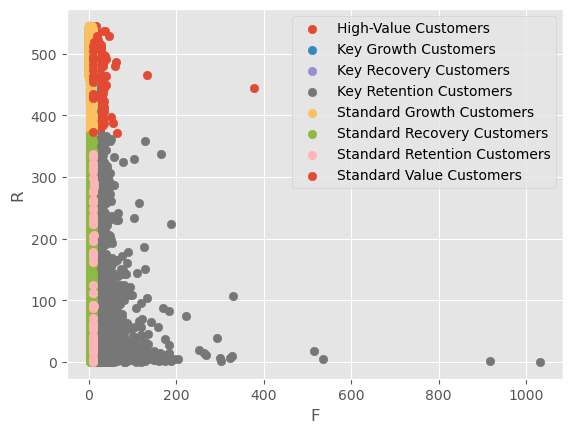

In [88]:
# Customer Segmentation Visualization
for label,grouped in rfm.groupby('label'):
    print(label,grouped)
    x = grouped['F'] # Number of purchases per user
    y = grouped['R'] # Number of days between the last purchase date and July 1998
    plt.scatter(x, y, label=label)
plt.legend() # Show legend
plt.xlabel('F')
plt.ylabel('R')
plt.show()    

#### User Cohort Analysis: New, Active, Dormant, and Reactivated Users

In [94]:
'''
New users are defined as those making their first purchase.
Active users are existing customers who have made purchases within a certain time window.
Inactive users are existing customers who have not made any purchases within the time window.
Returning users: Equivalent to repeat customers.
User return behavior can be categorized into organic return and assisted return. Organic return means users come back on their own, while assisted return is driven by manual intervention (such as marketing campaigns or promotions).
'''
pivoted_counts = df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)
pivoted_counts

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Convert to binary (0/1) to indicate purchase status
df_purchase = pivoted_counts.map(lambda x:1 if x>0 else 0)
# apply: applies a function along an axis (row or column) of a DataFrame
# map: applies a function element-wise to every element in a DataFram
df_purchase.head()

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [104]:
# Determine user segment: new, active, dormant, or reactivated
def active_status(data): # Entire row of data, 18 columns in total
    status = [] # # Stores the status for 18 months (one column per month)
    for i in range(len(data)):
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            pass
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
                    
    return pd.Series(status,df_purchase.columns)

purchase_states = df_purchase.apply(active_status, axis=1) # Get user segmentation results
purchase_states.head()

/var/folders/zj/qg5wsktj2hx43sww1lt6szbm0000gn/T/ipykernel_23684/3583350512.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 0:


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [107]:
# Substitute 'unreg' with nan
purchase_states_ct = purchase_states.replace('unreg', np.nan).apply(lambda s: s.value_counts())
purchase_states_ct.head(60)

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


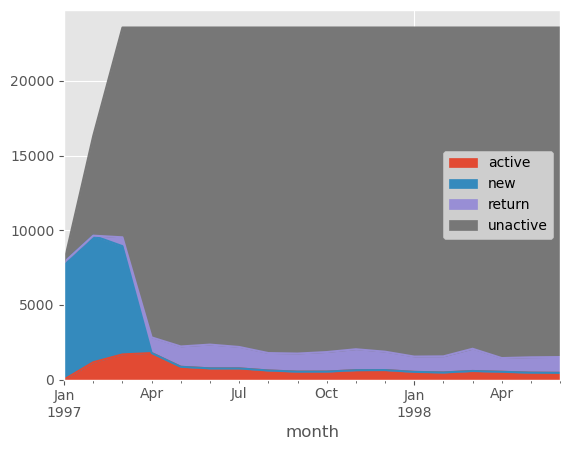

In [110]:
purchase_states_ct.T.fillna(0).plot.area()
plt.show()
# Key Findings from the visualization:

# 1. Early Stage (First 3 Months):
#    - Active users (red) and new users (blue) constitute the largest segments
#    - High proportion of user acquisition and engagement
#    - Indicates successful initial growth phase

# 2. Mid to Late Stage (Post-April):
#    - New user acquisition begins to decline
#    - Active user count shows downward trend
#    - Both metrics stabilize at lower, consistent levels
#    - Suggests market maturation

# 3. Returning Users (Post-April):
#    - Return users emerge as a significant segment after April
#    - Demonstrates stable, consistent pattern
#    - Critical customer segment for platform sustainability
#    - Indicates successful retention strategies

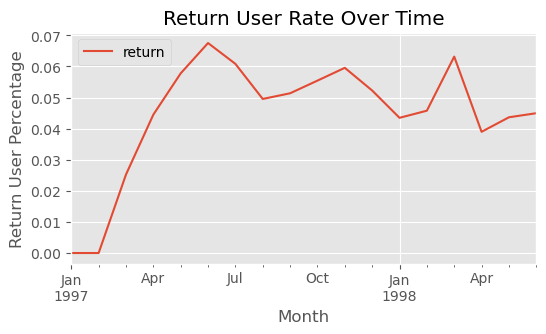

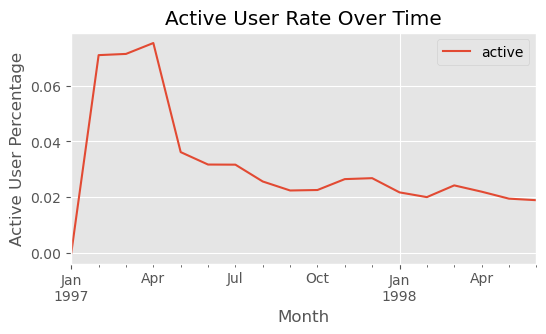

In [115]:
# Return User Rate Over Time
rate = purchase_states_ct.T.fillna(0).apply(lambda x: x/x.sum(),axis=1)
# Use pandas plotting (handles Period automatically)
rate['return'].plot(label='return', figsize=(6, 3))
plt.xlabel('Month')
plt.ylabel('Return User Percentage')
plt.title('Return User Rate Over Time')
plt.legend()
plt.show()

rate['active'].plot(label='active', figsize=(6, 3))
plt.xlabel('Month')
plt.ylabel('Active User Percentage')
plt.title('Active User Rate Over Time')
plt.legend()
plt.show()

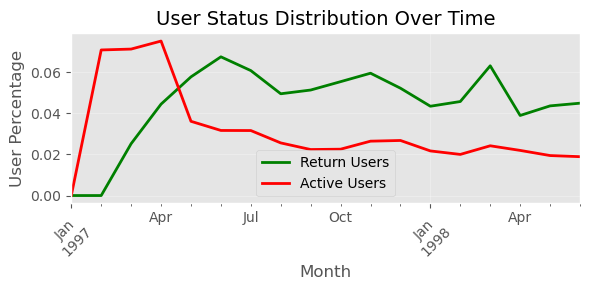

In [117]:
# Return User Rate Over Time
rate = purchase_states_ct.T.fillna(0).apply(lambda x: x/x.sum(), axis=1)

# Create figure first
plt.figure(figsize=(6, 3))

# Plot multiple lines before calling show()
rate['return'].plot(label='Return Users', color='green', linewidth=2)
rate['active'].plot(label='Active Users', color='red', linewidth=2)

# Add labels and show once at the end
plt.xlabel('Month', fontsize=12)
plt.ylabel('User Percentage', fontsize=12)
plt.title('User Status Distribution Over Time', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 
'''
ANALYSIS SUMMARY:
1. Returning Users:
   - First 5 months: Upward trend
   - Post-5 months: Declining trend, stabilizing at ~5%
   - Interpretation: Growing customer loyalty base

2. Active Users:
   - Months 1-3: Rapid growth (hypothesis: promotional campaigns)
   - Post-May: Decline to ~2.5% average
   - Interpretation: Initial spike driven by new user acquisition

3. Platform Maturity:
   - Return users > Active users (stable operations phase)
   - Indicates successful retention > new acquisition
   - Business health: Strong repeat purchase behavior
'''

#### Customer Purchase Cycle Analysis

In [119]:
# Calculate purchase cycle
order_diff = df.groupby('user_id')['order_date'].transform(
    lambda x: x - x.shift()
)
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

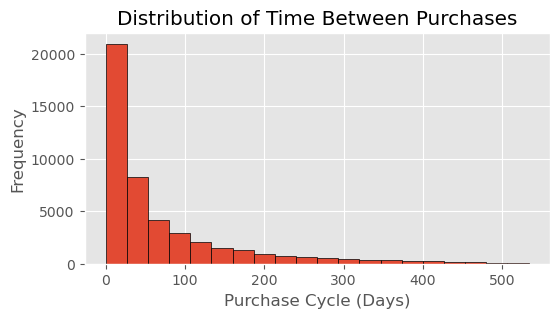

In [122]:
# Convert to days first
order_diff_days = order_diff.dt.days
# Use pandas hist method
order_diff_days.hist(bins=20, figsize=(6, 3), edgecolor='black')
plt.xlabel('Purchase Cycle (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Between Purchases')
# bins affects bar width: width = (max - min) / bins
plt.show()
'''
Key Findings:
- Average Purchase Cycle: 68 days
- Distribution Pattern: Long-tail (most users < 100 days)
- Low-Engagement Segment: Small proportion with cycles > 200 days

Actionable Insight:
Deploy targeted retention campaigns for users with extended purchase cycles. 
Send promotional coupons 3 days prior to expected repurchase date to boost 
purchase frequency.
'''

#### Customer Lifecycle Analysis

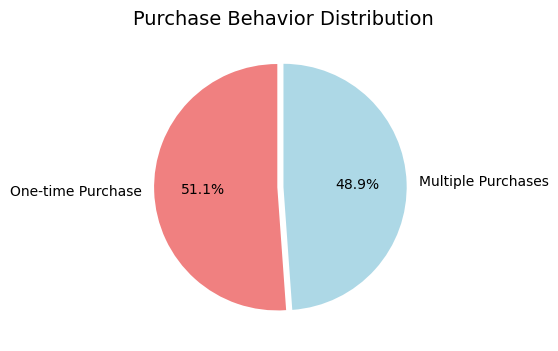

buyer_type
One-time Purchase     12054
Multiple Purchases    11516
Name: count, dtype: int64


In [127]:
# CUSTOMER LIFETIME CALCULATION
# Calculation Methodology:
# Step 1: Identify first purchase date (MIN) per customer
# Step 2: Identify last purchase date (MAX) per customer  
# Step 3: Calculate difference: Last - First
# Step 4: Interpret results:
#         - Difference = 0 days → One-time buyer (single purchase)
#         - Difference > 0 days → Repeat buyer (multiple purchases)
user_life = df.groupby('user_id')['order_date'].agg(['min', 'max'])
user_life['buyer_type'] = np.where(
    user_life['max'] == user_life['min'],
    'One-time Purchase',
    'Multiple Purchases'
)

# Visualize
buyer_distribution = user_life['buyer_type'].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(buyer_distribution.values,
        labels=buyer_distribution.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'lightblue'],
        explode=(0.05, 0))
plt.title('Purchase Behavior Distribution', fontsize=14)
plt.show()
print(buyer_distribution)
'''
With over 50% of customers being one-time purchasers, this indicates 
significant retention challenges and suggests opportunities for improving 
customer engagement strategies.
'''

In [128]:
(user_life['max'] - user_life['min']).describe()
'''
Customer Lifetime Analysis:

The average customer lifetime is 134 days, however, the median is 0 days. 
This confirms that the majority of customers made only a single purchase, 
representing low-quality users with minimal engagement.

Users in the top 25th percentile (above 75th percentile) demonstrate 
lifetimes exceeding 294 days, representing core customers who require 
focused retention efforts and priority service.

Data scope: New users from the first three months. Therefore, this analyzes the lifecycle of these early-stage users
'''

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

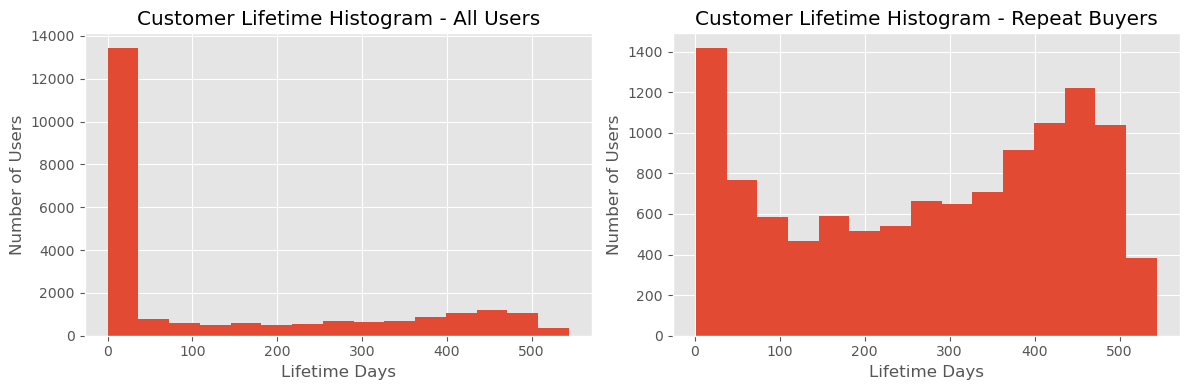

In [158]:
# VISUALIZE CUSTOMER LIFETIME DISTRIBUTION
plt.figure(figsize=(12, 4))  

plt.subplot(1, 2, 1)
((user_life['max'] - user_life['min'])/np.timedelta64(1, 'D')).hist(bins=15)
plt.title('Customer Lifetime Histogram - All Users')
plt.xlabel('Lifetime Days')
plt.ylabel('Number of Users')

plt.subplot(1, 2, 2)
u_1 = (user_life['max'] - user_life['min']).reset_index()[0]/np.timedelta64(1, 'D')
u_1[u_1>0].hist(bins=15)
plt.title('Customer Lifetime Histogram - Repeat Buyers')
plt.xlabel('Lifetime Days')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()  
'''
Comparative Analysis:
Chart 2 excludes users with lifetime = 0 days, revealing a bimodal 
distribution pattern.

While Chart 2 still shows a portion of users with near-zero lifetimes, 
the distribution is significantly improved compared to Chart 1. These 
customers made multiple purchases but lack sustained engagement, 
representing regular users who would benefit from targeted marketing 
campaigns to encourage longer-term consumption patterns.

A smaller segment demonstrates lifetimes concentrated in the 300-500 day 
range, representing our loyal customer base. This high-value segment 
requires intensive retention efforts and VIP service.
'''

#### Repeat Purchase Rate and Repurchase Rate Analysis

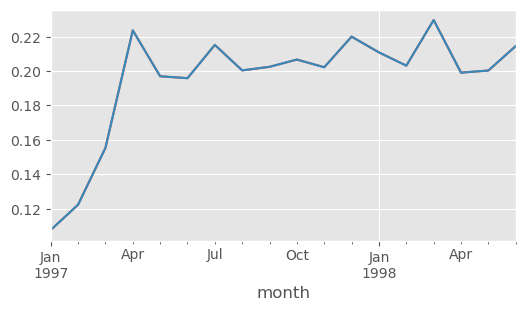

In [138]:
# Calculation Method:
# Within each calendar month, calculate the percentage of users who made multiple purchases among total purchasing users
# Note: Same-day multiple purchases also count as repeat purchases

# Customer Segmentation by Purchase Behavior:
# Segment 1: Multi-purchase customers (≥2 transactions) -- 1
# Segment 2: Single-purchase customers (1 transaction) -- 0
# Segment 3: Non-purchasing users (0 transactions this month) -- nan, nan values are not counted
purchase_r = pivoted_counts.map(lambda x: 1 if x> 1 else np.nan if x==0 else 0)
purchase_r.head()
(purchase_r.sum()/purchase_r.count()).plot(figsize=(6, 3))
plt.show()
"""
Trend Analysis:
- Months 1-3: Repeat purchase rate increases
- Month 4+: Stabilizes at 20-22% range

Root Cause:
The lower repeat rate in early months is attributed to high new user 
acquisition, where the majority of new customers made only one purchase, 
diluting the overall repeat purchase percentage.
"""

#### Repurchase Rate Analysis


In [142]:
## Methodology: Measure the proportion of customers who made purchases in consecutive time periods
def purchase_back(data):
    status = []  # Store repurchase status for each period    
    # Status classification:
    # 1 = Repurchased user (active in consecutive periods)
    # 0 = Non-repurchase user (active this period, inactive next)
    # NaN = Inactive in current period    
    for i in range(17):
        # Check if user made a purchase in current period
        if data.iloc[i] == 1:
            # Check next period
            if data.iloc[i+1] == 1:
                # User purchased in both current and next period
                status.append(1)  # Repurchased
            elif data.iloc[i+1] == 0:
                # User purchased this period but not next
                status.append(0)  # Did not repurchase
        else:
            # No purchase in current period
            status.append(np.nan)  # Inactive
    # Fill last period (no next period to compare)
    status.append(np.nan)
    return pd.Series(status, df_purchase.columns)
# Apply repurchase calculation to all users
purchase_b = df_purchase.apply(purchase_back, axis=1)
purchase_b.head()

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


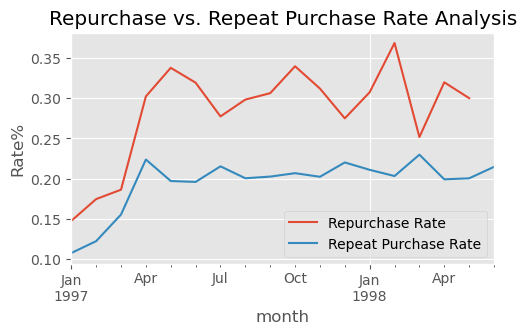

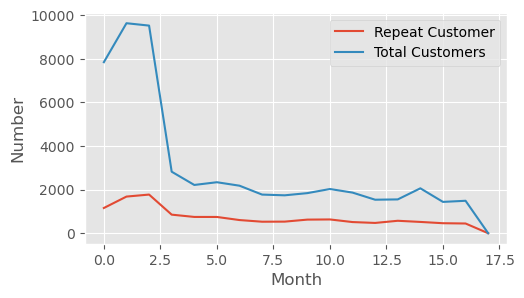

In [155]:
# Repurchase Rate Visualization
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
(purchase_b.sum()/purchase_b.count()).plot(label='Repurchase Rate')
(purchase_r.sum()/purchase_r.count()).plot(label='Repeat Purchase Rate')
plt.legend()
plt.ylabel('Rate%')
plt.title('Repurchase vs. Repeat Purchase Rate Analysis')
plt.show()
"""
Key Findings:

Repurchase Rate:
Stabilizes around 30% with moderate volatility, showing some fluctuation 
across periods.

Repeat Purchase Rate:
Lower than repurchase rate, stabilizing at approximately 20% with minimal 
volatility and more consistent performance.

Early-Stage Trend (First 3 Months):
Both repurchase and repeat purchase rates exhibit upward trends, indicating 
that new users require time to develop into repeat or repurchasing customers.

Customer Loyalty Insight:
Combined with new vs. existing customer analysis, new customer loyalty is 
significantly lower than that of existing customers, highlighting the 
importance of retention programs for new user conversion.
"""
# Number of repeat customers and total number of customers
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 2)
plt.plot(purchase_b.sum().values, label='Repeat Customer')
plt.plot(purchase_b.count().values, label='Total Customers')
plt.xlabel('Month')
plt.ylabel('Number')
plt.legend()
plt.show()

In [ ]:
"""
Analysis Conclusions
1. Overall Trends: Annual monthly sales volume and revenue are relatively high in January-March, then drop sharply. This may be attributed to heavy promotional activities during this period or seasonal product attributes.

2. User Purchase Behavior: Transaction amounts and product quantities per order are concentrated at the lower end of the spectrum, with small-value, low-volume purchases. For this customer segment, expanding product lines and increasing promotional activities can improve conversion rates and purchase frequency.

3. Spending Distribution: Most users' total spending and purchase volumes are concentrated at the lower end with a long-tail distribution. This correlates with user demand patterns. Products can be positioned with diversified cultural value propositions to enhance social value attributes and increase perceived user value.
4. Purchase Cycle: Users with repeat purchases have an average purchase cycle of 68 days. Therefore, reactivation campaigns should target these users within the 50-60 day window. For example: follow up with satisfaction surveys at 10 days, distribute coupons at 30 days, and send coupon usage reminders at 55 days.
5. Customer Lifetime: The average lifetime for users with two or more purchases is 276 days. Customer lifetimes are distributed in two clusters: under 20 days and between 400-500 days. Customers within 20 days should be nurtured to encourage repeat purchases and build consumption habits, extending their lifetime value. For customers in the 100-400 day range, targeted marketing campaigns should be implemented to drive continued engagement.
6. Repurchase Rates: New customer repurchase rate is approximately 12%, while existing customer repurchase rate is around 20%. New customer return rate is approximately 15%, while existing customer return rate is around 30%. Marketing strategies should actively encourage repeat purchases and sustained consumption.
7. Customer Quality: User spending patterns follow a consistent distribution, with most users spending under 2,000. Customer spending reflects the Pareto Principle (80/20 rule): the top 20% of customers contribute 80% of total revenue. Therefore, focusing on high-value customers is a timeless priority. These high-quality customers should be treated as "VIP members" with optimized shopping experiences, such as dedicated customer service lines, exclusive discounts, and special perks.

Analysis Framework:
Temporal Analysis (Monthly):

User-level and aggregate cohort analysis
Dimensions: headcount, revenue, transaction volume

Behavioral Segmentation:

First purchase date, last purchase date, purchase frequency
RFM segmentation with pivot analysis
Customer lifecycle stages: acquisition, retention, churn, reactivation

Retention Metrics:

Repeat purchase rate
Win-back/reactivation rate
"""